In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#Linear Regression
# 1. assumption checking
    # 1.linearity 
    # 2.no multi-linearity
    # 3.no auto correlation
    # 4.no outliers
    # 5.no null values
    # 5.char to number -N/A here

<Axes: >

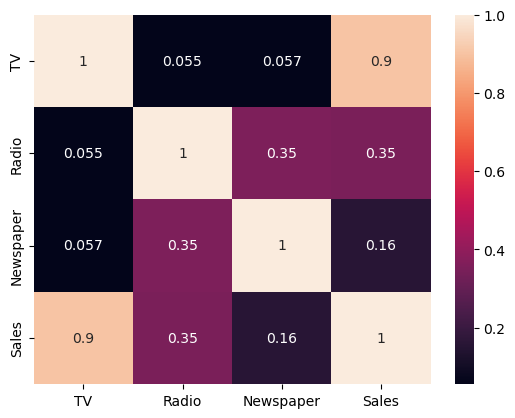

In [5]:
sns.heatmap(data.corr(),annot=True)

In [6]:
#linearir=ty - verified
# multi linearity verified but newspaper n radio are correlated but not dropping cols cz cols are less 
# auto corelation- verified

{'whiskers': [<matplotlib.lines.Line2D at 0x222cbd18b10>,
 'caps': [<matplotlib.lines.Line2D at 0x222cbdcae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x222cbdc8bd0>,
 'medians': [<matplotlib.lines.Line2D at 0x222cbab5f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x222cbab5310>,
 'means': []}

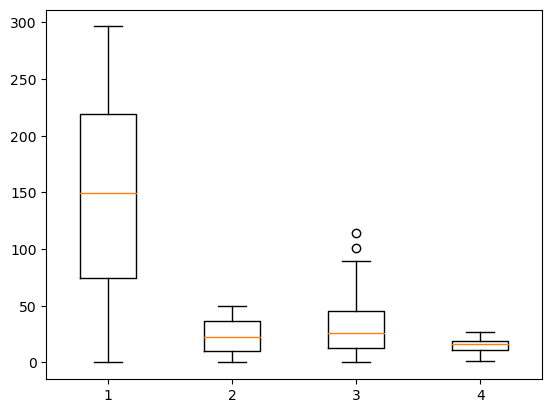

In [7]:
plt.boxplot(data)

In [8]:
data_new = data[data["Newspaper"]<90]

{'whiskers': [<matplotlib.lines.Line2D at 0x222cbe5e690>,
 'caps': [<matplotlib.lines.Line2D at 0x222cbe5fc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x222cbe00e50>,
 'medians': [<matplotlib.lines.Line2D at 0x222cbe690d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x222cbe69bd0>,
 'means': []}

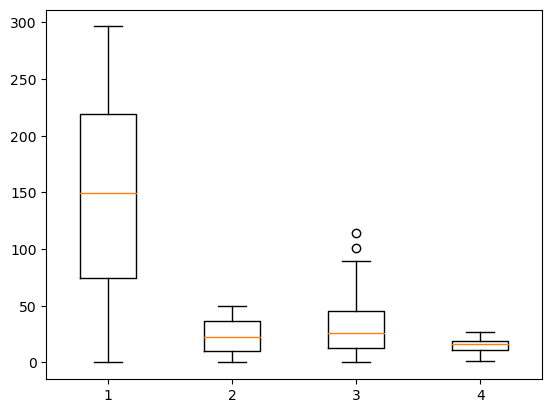

In [9]:
plt.boxplot(data)

In [10]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
#if null values are 30% n less thn fill null values with mean,mode or median
#if more thn 30% then drop cols or rows wic are more

In [12]:
# Linear Regression
# y = b0 +b1x1 + b2x3 + b3x3....bnxn          b=beta
# sales = b0 + b1"Tv"  + b2"Radio" + b3"Newspaper"


In [13]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
#example:
#22.1= b0 + b1 230.1 + b2 37.8 + b3 69.2       b is sm value of y wic vil be when x=0

In [15]:
x=data[["TV","Radio","Newspaper"]]     #double bracket cz x ha multiple values n thy r taken as list values
y=data[["Sales"]]                      #only one value so np if single bracket is als taken

In [16]:
data.shape

(200, 4)

In [17]:
x.shape

(200, 3)

In [18]:
y.shape

(200, 1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  #20-30

In [20]:
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160, 1)

(40, 3)
(40, 1)


In [21]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()     #y it i saved in vairable

In [23]:
lm.fit(x_train,y_train)

LinearRegression()

In [24]:
# y = b0 + b1x1 + b2x2 + b3x3

In [25]:
print(lm.coef_)

[[0.05531226 0.10046194 0.0020196 ]]


In [27]:
print(lm.intercept_)   #value of y when al x are zero

[4.59847723]


<Axes: >

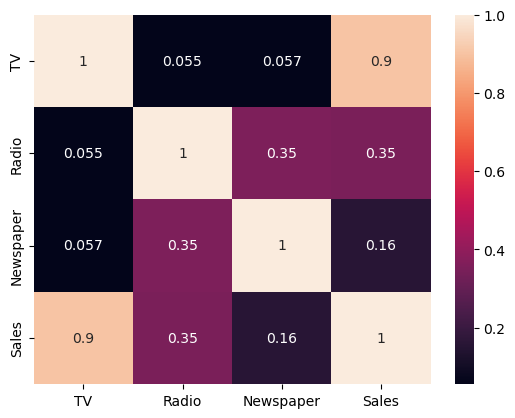

In [28]:
sns.heatmap(data.corr(),annot=True)

In [30]:
y_pred=lm.predict(x_test)

In [31]:
y_pred

array([[14.09440186],
       [13.78541847],
       [20.68408172],
       [22.28920145],
       [11.55170479],
       [18.62989408],
       [ 9.57421451],
       [11.12154435],
       [16.91240358],
       [15.8927278 ],
       [22.76136339],
       [13.03484159],
       [ 8.65613535],
       [18.05123444],
       [20.51452714],
       [19.60291456],
       [20.18230718],
       [21.59577533],
       [16.88937021],
       [ 6.00212766],
       [16.35865736],
       [19.02149658],
       [13.78077335],
       [16.97984636],
       [22.05442392],
       [ 7.02611592],
       [10.65946494],
       [ 8.33964147],
       [10.31751458],
       [10.62665998],
       [11.96749493],
       [ 6.39774757],
       [18.34877487],
       [ 6.32210922],
       [22.07442187],
       [18.08203526],
       [17.82233477],
       [14.92793785],
       [ 9.95126889],
       [21.83185928]])

In [34]:
new_df= pd.DataFrame()
new_df= x_test
new_df['actual sales']=y_test
new_df['predicted sales']=y_pred
new_df

,TV,Radio,Newspaper,actual sales,predicted sales
57,136.2,19.2,16.6,13.2,14.094402
37,74.7,49.4,45.7,14.7,13.785418
55,198.9,49.4,60.0,23.7,20.684082
93,250.9,36.5,72.3,22.2,22.289201
80,76.4,26.7,22.3,11.8,11.551705
146,240.1,7.3,8.7,18.2,18.629894
12,23.8,35.1,65.9,9.2,9.574215
6,57.5,32.8,23.5,11.8,11.121544
95,163.3,31.6,52.9,16.9,16.912404
171,164.5,20.9,47.4,17.5,15.892728


In [35]:
lm.score(x_train,y_train)*100

90.61960503003452

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)     #r square how better is performance of model compared to mean model
print("R-squared:", r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))   #rmse (difference btwn actual and predicted value) how good is best fit line
print("RMSE:",rmse)

R-squared: 0.8849537893730108
RMSE: 1.7522076793728276


In [37]:
#to save model
import joblib

In [38]:
joblib.dump(lm,"model.pkl")

['model.pkl']